In [50]:
from lxml import etree
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

In [4]:
%load_ext autoreload
%autoreload 2

In [2]:
import extract as X
import parsing_xml as px

In [14]:
ag = etree.parse('data/short_starts_withp_graph.xml').getroot()

In [29]:
G = nx.DiGraph()
def_dict = {} #keys: dfndum Value: list of hashes of statements where the is appears
hash_dict = {} # keys: hashe of statements, Values: the text of the statement
for D in ag.iter(tag = 'stmnt'):
    hash_dict[hash(D.text)] = D.text
    
for d in ag.iter(tag = 'dfndum'):
    D = d.getparent().find('stmnt').text
    if d.text.strip() in def_dict:
        def_dict[d.text.strip()].append(hash(D))
    else:
        def_dict[d.text.strip()] = [hash(D),]
print('def_dict has this many elements ', len(def_dict.values()))

def_dict has this many elements  70


In [30]:
dgraph = nx.DiGraph()

In [44]:
empty_str_if_none = lambda s: s if s  else ''
for k,d_raw in enumerate(def_dict.keys()):
    d = d_raw.strip()
    if k%1000 == 0:
        print('doing k=', k)
    for Def in ag.iter(tag = 'definition'):
        D = Def.find('.//stmnt')
        #Check if D is not a definition for d
        if hash(D.text) in def_dict[d]:
            pass
        else:
            dfndum_lst = [c.text for c in D.getparent().findall('.//dfndum') ]
            if d in empty_str_if_none(D.text):
                add_edges_lst = [(d, p.strip()) for p in dfndum_lst if d != p]
                dgraph.add_edges_from(add_edges_lst)

doing k= 0


In [45]:
dgraph.nodes()

NodeView(('supported on', 'approximation holds for the triple', 'approximation by perfect complexes holds', 'subsheaf of sections supported on ', 'Sets', 'big pro-étale site', 'morphism of', 'perfect relative to ', '-perfect', 'Picard functor', 'Ab', 'extension by zero', 'Mod', 'local isomorphism', 'ind-Zariski', 'pro-étale covering of', 'standard pro-étale covering', 'big pro-étale site of ', 'small pro-étale site of ', 'big affine pro-étale site of ', 'Aff', 'restriction to the small pro-étale site', 'constructible', 'adic lisse', 'adic constructible', 'lisse', 'integral', 'Japanese', 'universally Japanese', 'Nagata', 'local', 'resolution property', 'w-local', 'identifies local rings', 'constructible ', 'locally ', 'locally Noetherian', 'Noetherian', 'normal', 'regular in codimension ', 'regular locus', 'singular locus', 'unibranch at ', 'geometrically unibranch at ', 'unibranch', 'geometrically unibranch', 'number of branches of ', 'number of geometric branches of ', 'locally projec

/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


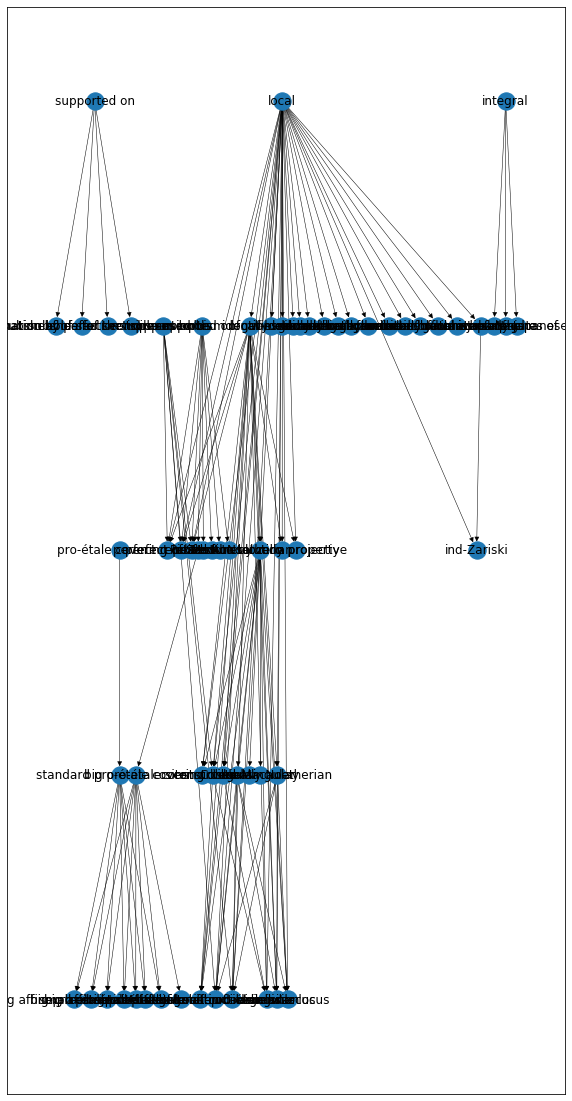

In [59]:
opts = {
    'node_size': 300,
    'width': 0.5,
    'with_labels': True,
}
plt.figure(1, figsize=(10,20))
pos = graphviz_layout(dgraph, prog='dot')
nx.draw_networkx(dgraph, pos, **opts)
plt.savefig('../starts_with_p_spectral.pdf')

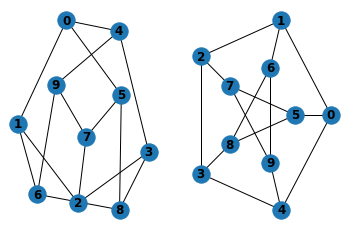

In [80]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [48]:
nx.find_cycle(dgraph)

NetworkXNoCycle: No cycle found.